sep stopped being maintained from 2022 up until very recently, as such it does not support my versions of python and numpy so i'm using sep-pjw

In [1]:
import numpy as np
import sep_pjw as sep

In [2]:
from astropy.io import fits
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline

rcParams['figure.figsize'] = [10.,8.]


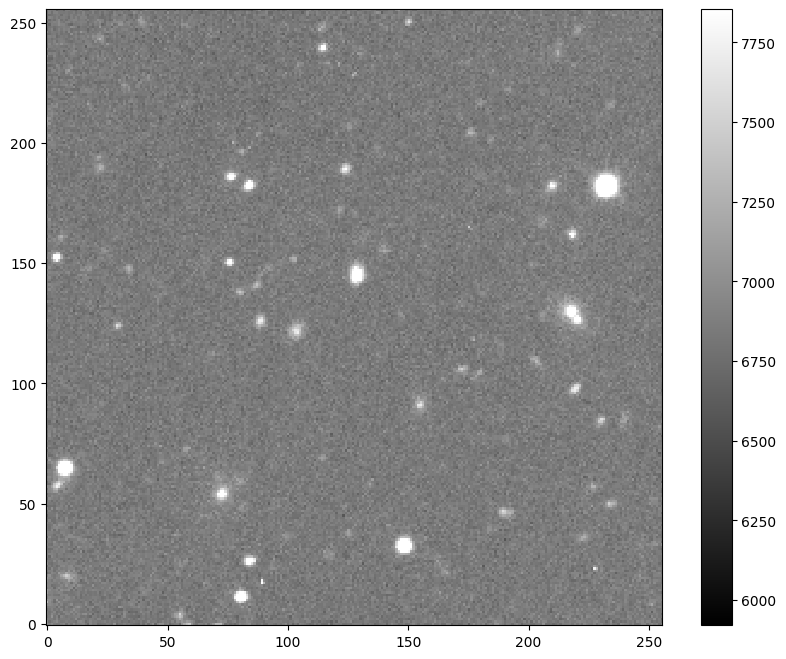

In [32]:
data = fits.getdata("image.fits")


m,s = np.mean(data), np.std(data)
plt.imshow(data,interpolation='nearest',cmap='gray',vmin=m-s,vmax=m+s,origin='lower')
plt.colorbar();

In [5]:
bkg = sep.Background(data)

In [ ]:
#eval background as 2d array with same size as image.fits
print(bkg.globalback)
print(bkg.globalrms)

6852.04931640625
65.46174621582031


In [7]:
bkg_image = bkg.back()

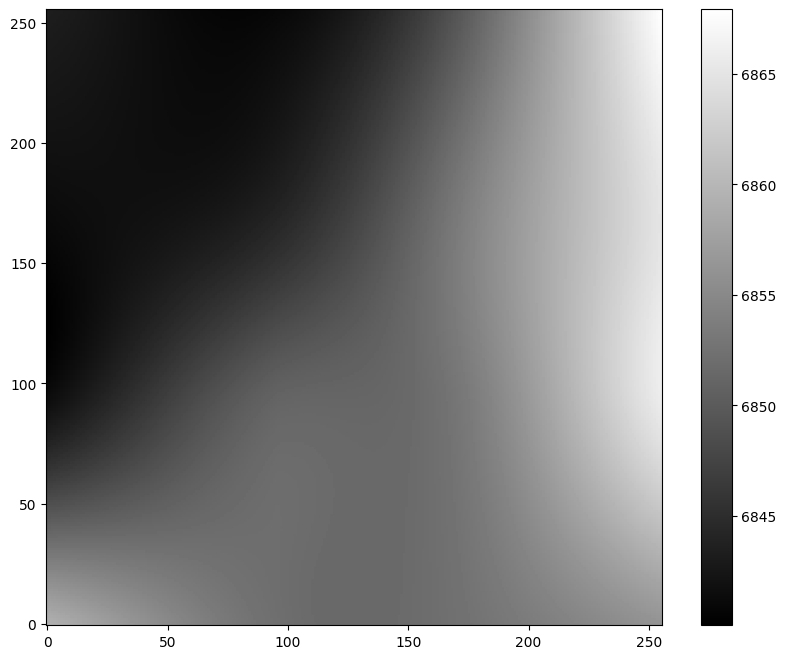

In [9]:
plt.imshow(bkg_image,interpolation='nearest',cmap='gray',origin='lower')
plt.colorbar()

In [10]:
#eval background noise as 2d array
bkg_rms = bkg.rms()

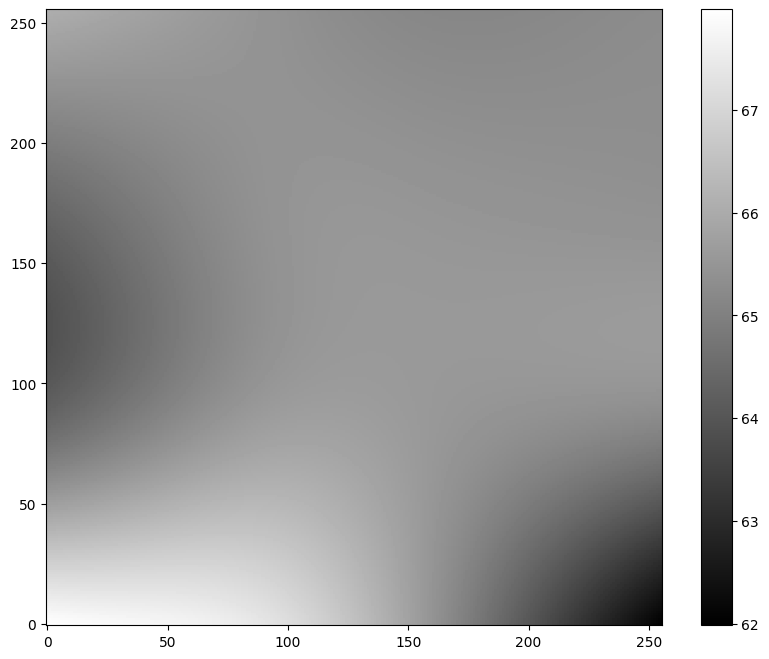

In [11]:
plt.imshow(bkg_rms,interpolation='nearest',cmap='gray',origin='lower')
plt.colorbar()

In [12]:
#subtract the bacground
data_sub = data - bkg #6,7,8,9,10 were all things we can do w/ bkg, but we dont need to

In [13]:
objects = sep.extract(data_sub,1.5,err=bkg.globalrms)

In [14]:
len(objects)

69

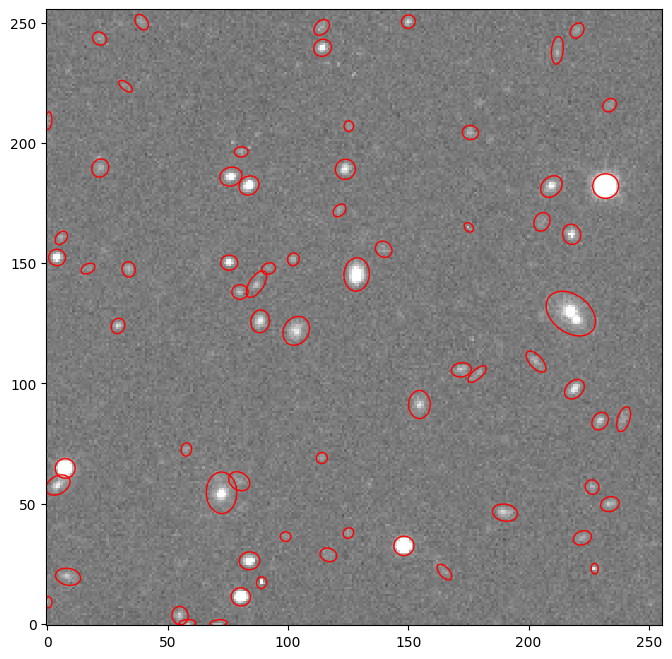

In [24]:
from matplotlib.patches import Ellipse

fig,ax = plt.subplots()
m,s, = np.mean(data_sub),np.std(data_sub)
im = ax.imshow(data_sub,interpolation='nearest',cmap='gray',
               vmin=m-s,vmax=m+s,origin='lower')

for i in range(len(objects)):
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]),
                width=6*objects['a'][i],
                height=6*objects['b'][i],
                angle=objects['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)

In [25]:
#available fields
objects.dtype.names

('thresh',
 'npix',
 'tnpix',
 'xmin',
 'xmax',
 'ymin',
 'ymax',
 'x',
 'y',
 'x2',
 'y2',
 'xy',
 'errx2',
 'erry2',
 'errxy',
 'a',
 'b',
 'theta',
 'cxx',
 'cyy',
 'cxy',
 'cflux',
 'flux',
 'cpeak',
 'peak',
 'xcpeak',
 'ycpeak',
 'xpeak',
 'ypeak',
 'flag')

In [ ]:
flux,fluxerr,flag = sep.sum_circle(data_sub,objects['x'],objects['y'],3.0,err=bkg.globalrms,gain=1.)
#flux,fluxerr,flag are 1d arrays w/ one entry per object

In [28]:
for i in range(10):
    print('object {:d}: flux = {:f} +/- {:f}'.format(i,flux[i],fluxerr[i]))

object 0: flux = 2249.159297 +/- 291.027802
object 1: flux = 3092.220430 +/- 291.592204
object 2: flux = 5949.868379 +/- 356.562003
object 3: flux = 1851.426582 +/- 295.028816
object 4: flux = 72736.386914 +/- 440.172206
object 5: flux = 3860.756152 +/- 352.163162
object 6: flux = 6418.913789 +/- 357.458973
object 7: flux = 2210.707656 +/- 350.791223
object 8: flux = 2741.607227 +/- 352.277746
object 9: flux = 20916.875566 +/- 376.966138
